
 # 
 https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/

ANN - artificial neural network
CNN - 


RNN recurrent neural network
* uses feedback loops
* creates "memory"
* independent variable becomes dependent in next layer
* used for speech recognition, language modeling, image classification
* standard RNN contains a single layer

LSTM has more complex repeating structure
* four layers
    - Neural net
    - Poitwise Operation
    - Vector transformer
    - Concatenate
    - Copy

* BI-LSTM
    - sequence info in both dirs (future & past)
    - input flows two directions.
    





In [29]:
#!/bin/sh

!pip3 install tensorflow

# https://matplotlib.org/stable/users/installing/index.html
!pip3 install matplotlib

!pip3 install keras
!pip3 install keras.preprocessing
!pip3 install keras.models
!pip3 install keras.layers 
!pip3 install keras.datasets
!pip3 install keras.utils


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=60156838251a2a70637cb2bc8590b5a9c478107580393f722d4726abc0c6c17b
  Stored in directory: /home/brianh/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b

In [32]:

 # https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/
 
 import numpy as np
 from keras.preprocessing import sequence
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
 from keras.datasets import imdb 
 from keras.utils.data_utils import pad_sequences


 

In [33]:
 n_unique_words = 10000 # cut texts after this number of words
 maxlen = 200
 batch_size = 128 

 

In [34]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

convert data into matrices


In [37]:
 x_train = keras.utils.data_utils.pad_sequences(x_train, maxlen=maxlen)
 x_test = keras.utils.data_utils.pad_sequences(x_test, maxlen=maxlen)
 y_train = np.array(y_train)
 y_test = np.array(y_test) 

* conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
* export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/
* python3 -m pip install tensorflow

python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

wget https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/cuda-wsl-ubuntu.pin
sudo mv cuda-wsl-ubuntu.pin /etc/apt/preferences.d/cuda-repository-pin-600
sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/3bf863cc.pub
sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/ /"
sudo apt-get update
sudo apt-get -y install cuda

create a bi-lstm



In [40]:

 model = Sequential()
 model.add(Embedding(n_unique_words, 128, input_length=maxlen))
 model.add(Bidirectional(LSTM(64)))
 model.add(Dropout(0.5))
 model.add(Dense(1, activation='sigmoid'))
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

fit the model with data that we loaded

In [41]:
 history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
 print(history.history['loss'])
 print(history.history['accuracy']) 

Epoch 1/12
196/196 [==============================] - 129s 633ms/step - loss: 0.4789 - accuracy: 0.7570 - val_loss: 0.3159 - val_accuracy: 0.8666
Epoch 2/12
196/196 [==============================] - 124s 636ms/step - loss: 0.2473 - accuracy: 0.9047 - val_loss: 0.3220 - val_accuracy: 0.8710
Epoch 3/12
196/196 [==============================] - 162s 828ms/step - loss: 0.1858 - accuracy: 0.9334 - val_loss: 0.3554 - val_accuracy: 0.8663
Epoch 4/12
196/196 [==============================] - 152s 778ms/step - loss: 0.1367 - accuracy: 0.9521 - val_loss: 0.3912 - val_accuracy: 0.8635
Epoch 5/12
196/196 [==============================] - 154s 788ms/step - loss: 0.1063 - accuracy: 0.9639 - val_loss: 0.3932 - val_accuracy: 0.8574
Epoch 6/12
196/196 [==============================] - 174s 891ms/step - loss: 0.0939 - accuracy: 0.9677 - val_loss: 0.4324 - val_accuracy: 0.8559
Epoch 7/12
196/196 [==============================] - 180s 919ms/step - loss: 0.0916 - accuracy: 0.9692 - val_loss: 0.4440 -

measure bi-lstm performance

this is good: accuracy line is near 1, loss line is near zero 

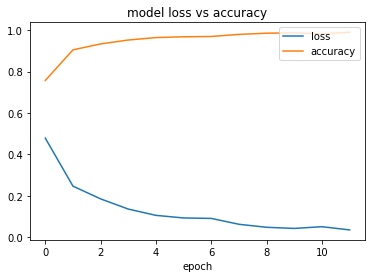

In [42]:
 from matplotlib import pyplot
 pyplot.plot(history.history['loss'])
 pyplot.plot(history.history['accuracy'])
 pyplot.title('model loss vs accuracy')
 pyplot.xlabel('epoch')
 pyplot.legend(['loss', 'accuracy'], loc='upper right')
 pyplot.show() 